#####  nn.Conv2d(
#####            in_channels,
#####            intermediate_channels,
#####            kernel_size=1,
#####            stride=1,
#####            padding=0,
#####            bias=False,
#####        )

In CNN, we have two fundamental components, Input and Kernel.

Input in CNN is typically an image or a multidimensional array representing data.
Kernel is basically a small matrix of weights that perform convolution operations on input data.

Pretty sure you've a thought here, What is convolution??
It is a sliding window operation that combines two pieces of information, input and kernel.
This is very fundamental operation in convolution. We perform the same operation between input & kernel that will further produce the output (another matrix).

**Convolution** and **cross-correlation** are both mathematical operations that combine two signals to produce a third signal. They are widely used in signal processing, image processing, machine learning, and other fields. While they are similar, they have key differences in their definitions and applications.

### 1. **Definition**

- **Convolution:**
  - Convolution is an operation that combines two functions (or sequences) to produce a third function (or sequence). It is defined as the integral (or sum, in the discrete case) of the product of the two functions after one is flipped and shifted.
  - **Mathematically (continuous):**
    \[
    (f * g)(t) = \int_{-\infty}^{\infty} f(\tau) \cdot g(t - \tau) \, d\tau
    \]
  - **Mathematically (discrete):**
    \[
    (f * g)[n] = \sum_{m=-\infty}^{\infty} f[m] \cdot g[n - m]
    \]
  - **Key Point:** The second function (or signal) is flipped (time-reversed) before shifting and multiplying.

- **Cross-Correlation:**
  - Cross-correlation measures the similarity between two functions (or sequences) as one is shifted relative to the other.
  - **Mathematically (continuous):**
    \[
    (f \star g)(t) = \int_{-\infty}^{\infty} f(\tau) \cdot g(t + \tau) \, d\tau
    \]
  - **Mathematically (discrete):**
    \[
    (f \star g)[n] = \sum_{m=-\infty}^{\infty} f[m] \cdot g[m + n]
    \]
  - **Key Point:** The second function (or signal) is shifted but not flipped.

### 2. **Key Differences**

- **Flipping:** 
  - In convolution, the second signal is flipped (reversed in time) before being shifted. In cross-correlation, there is no flipping; the signal is only shifted.

- **Order of Operations:**
  - For convolution, the order of the two functions matters because flipping one signal can produce a different result.
  - For cross-correlation, the order typically does not matter, as both signals are treated symmetrically (no flipping).

- **Usage in Convolutional Neural Networks (CNNs):**
  - In CNNs, what is often called "convolution" is technically cross-correlation. The filters are not flipped; they are directly shifted across the input to produce the output.

- **Mathematical Relationship:**
  - Convolution can be seen as cross-correlation with one of the signals flipped. Specifically:
    \[
    (f * g)(t) = (f \star \tilde{g})(t)
    \]
    Where \( \tilde{g}(t) = g(-t) \) is the time-reversed version of \(g(t)\).

### 3. **Applications**

- **Convolution:**
  - Widely used in signal processing (e.g., filtering, linear systems) where the flipping operation is important.
  - Used in differential equation solving and system response analysis.
  - In image processing, convolution is used for operations like blurring, sharpening, edge detection, etc.

- **Cross-Correlation:**
  - Used in signal alignment, time delay estimation, and pattern recognition.
  - In image processing, cross-correlation is used for template matching, where a small template is matched with a larger image to find regions that are similar.

### 4. **Example in Image Processing**

- **Convolution:**
  - Applying a filter (e.g., Gaussian blur) to an image involves convolving the image with the filter kernel, which is flipped before the operation.
  
- **Cross-Correlation:**
  - Matching a small template (e.g., a patch of an image) to different locations in a larger image involves cross-correlating the template with the image to find where the template best fits (no flipping involved).

### 5. **Summary**

- **Convolution** involves flipping one of the functions before shifting and combining, which makes it sensitive to the specific order of operations. It is essential in systems analysis and filtering.
  
- **Cross-correlation** measures the similarity between two signals by shifting one without flipping, making it useful in tasks like signal alignment and pattern recognition.

In practice, especially in machine learning and image processing, the term "convolution" is often used interchangeably with "cross-correlation," even though they are technically different operations.

## so conv(I,K) = I * rot180(K) where * is cross corelation



1. (star) - ⋆ - cross correlation
2. (aestrick) -  * - convoution

So, **What is Real Convolution?**

It is basically performing same operation by rotating the kernel by 180 degrees.

i.e. new kernel matrix will be (rotating the previous matrix by 180 deg)

| 0 | -1 |
| --- | --- |
| 2 | 1 |

We can formulate convolution as :

> conv(I, K) = I  *  rot180(K) OR   I * K = I  * rot180(K), where I*K represent the Convolution!
> 

So, the Convolution between I and K is cross-correlation between I and rotated version of K.

There are multiple ways to perform cross-correlation and hence Convolution.

What we’ve seen above is called VALID Cross-Correlation!  It is basically calculating product by placing the kernel directly onto Input and start sliding when it hits the border of input.

There is another way we can perform this operation called, FULL Cross-Correlation.

In this version, we calculate the product as soon as there is intersection between kernel and input matrix. Obviously, in this case size of output matrix is bigger than previous one. 

One instance is shown here,
![alt text](Untitled.png)

We end this module here. I assume you’ve got a basic understanding of convolution.

Let’s move forward to module 2, it is very interesting .

In [1]:
# convolurion layer takes  in #dimensional block of data as input: W x H x C where C is depth
# the layer has trainsable parameters amongst them kernels
# each kernel has same depth as input mean it entends to full depth of input
# each layer can have multiple kernels :  out_channels=8 mean 8 kernels
# to each kernel we assciate a bias matrix which will have same shape as outut


conv weights:torch.Size([4, 3, 3, 3]) ; conv bias:torch.Size([4])


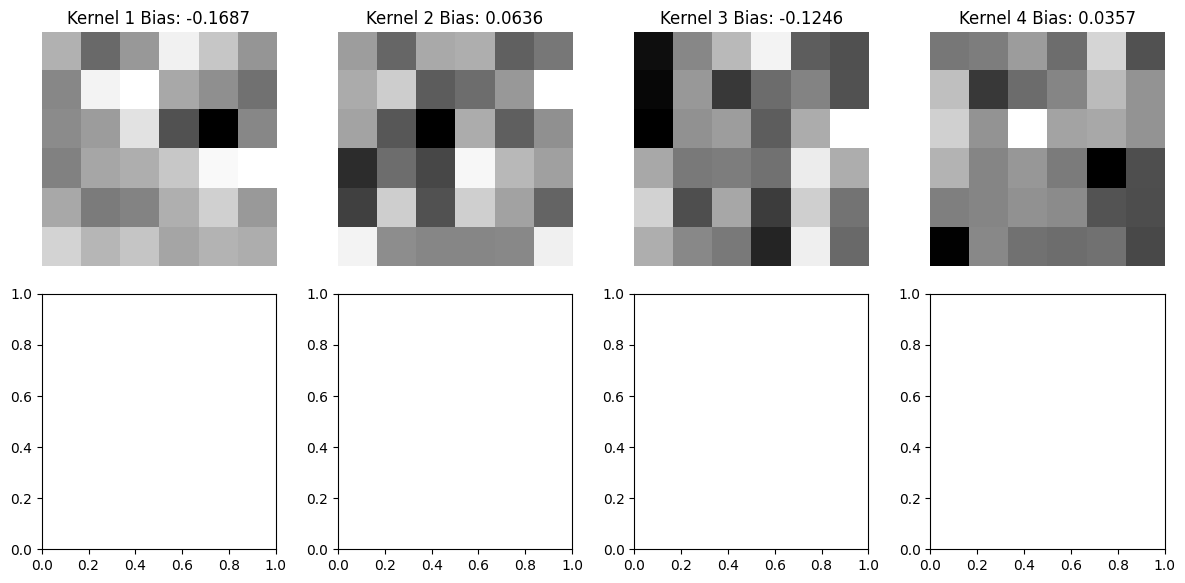

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a simple convolutional layer with bias
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layer with 3 input channels, 4 output channels (kernels), and a kernel size of 3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, bias=True)

    def forward(self, x):
        # Apply the convolutional layer
        x = self.conv1(x)
        return x

# Create a random input tensor with 3 channels, 8x8 pixels
input_tensor = torch.randn(1, 3, 8, 8)

# Instantiate the network and apply it to the input tensor
model = SimpleCNN()
output_tensor = model(input_tensor)

# Extract the feature maps (output of the convolutional layer)
feature_maps = output_tensor.squeeze(0)  # Remove the batch dimension

# Get the biases
biases = model.conv1.bias
print(f"conv weights:{model.conv1.weight.shape} ; conv bias:{model.conv1.bias.shape}")

# Plot the feature maps
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i in range(4):
    ax = axes[i // 4, i % 4]
    ax.imshow(feature_maps[i].detach().numpy(), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Kernel {i+1} Bias: {biases[i].item():.4f}')
plt.tight_layout()
plt.show()


In [3]:
ord('z')

122

In [4]:
alphabets = [ chr(_) for _ in range(ord('a'), ord('z')+1)]
b = [*alphabets]
print(*alphabets)
print(b)


a b c d e f g h i j k l m n o p q r s t u v w x y z
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In a convolutional layer within a neural network, the depth of the kernels (also known as filters) must match the depth of the input. 

Here's a more detailed explanation:

### Input Depth
- The depth of the input refers to the number of channels in the input data. For example, an RGB image has a depth of 3 because it has three channels: Red, Green, and Blue.

### Kernel (Filter) Depth
- The kernels in a convolutional layer also have a depth dimension. Each kernel is applied to all the channels of the input.

### Matching Depth
- For the convolution operation to be valid, the depth of the kernel must be the same as the depth of the input. This allows the kernel to interact with each channel of the input. If the input has 3 channels, the kernel must also have 3 channels.
- Each channel of the kernel is convolved with the corresponding channel of the input, and the results are summed to produce a single value in the output feature map.

### Example
- If you have an input with a size of \( 32 \times 32 \times 3 \) (e.g., a color image), and you use a kernel of size \( 5 \times 5 \), the kernel's size would actually be \( 5 \times 5 \times 3 \).
- The convolution operation would produce an output of size \( 28 \times 28 \times \text{number of kernels} \), where the number of kernels determines the number of output channels (also known as the depth of the output feature map).

### Why This Requirement?
- The convolution operation computes a weighted sum across the spatial dimensions (height and width) and across the depth (channels). For this to work, the kernel must have the same depth as the input so that it can properly combine information from all channels.

### Summary
- Yes, in a convolutional layer, the depth of the kernels must be the same as the depth of the input to allow for proper convolution across all channels.

You're absolutely correct, and I apologize for the confusion in my previous response. Thank you for pointing this out. You are right that in a convolutional layer, each output channel (corresponding to each kernel) has a single scalar value as bias. Let's correct the implementation to reflect this:

```python
import numpy as np
from layer import Layer
from scipy import signal

class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(depth)  # One bias per kernel/output channel

    def forward(self, input):
        self.input = input
        self.output = np.zeros(self.output_shape)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
            self.output[i] += self.biases[i]  # Add the scalar bias to the entire feature map
        return self.output

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)
        
        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")
        
        # Compute bias gradient
        biases_gradient = np.sum(output_gradient, axis=(1,2))
        
        # Update parameters
        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * biases_gradient

        return input_gradient
```

Key points in this corrected version:

1. In the `__init__` method:
   - `self.biases = np.random.randn(depth)`: This creates one bias per kernel/output channel.

2. In the `forward` method:
   - `self.output[i] += self.biases[i]`: This adds the scalar bias to the entire feature map for each output channel.

3. In the `backward` method:
   - `biases_gradient = np.sum(output_gradient, axis=(1,2))`: This computes the gradient for each bias by summing over the spatial dimensions of the output gradient.

This implementation correctly applies a single scalar bias to each output channel in the convolutional layer, which is the standard approach in CNNs. Thank you again for catching this important detail.

Yes, each kernel in a convolutional layer is associated with a single scalar bias. This bias is applied uniformly to every location in the output feature map produced by that kernel.

### Key Points:

1. **Kernel and Bias Relationship**:
   - Each kernel (or filter) in the convolutional layer has a corresponding scalar bias.
   - When the convolution operation is performed using a kernel, the same scalar bias is added to every value in the resulting feature map produced by that kernel.

2. **Bias Application**:
   - After applying a kernel to the input feature map, the bias is added to the entire output feature map (i.e., the feature map resulting from that kernel).

### Example

Let's break this down with a simple example:

- Suppose you have an input feature map of size \( H \times W \).
- You apply a convolutional kernel of size \( k \times k \) to this input feature map.
- The result is a feature map of size \( (H - k + 1) \times (W - k + 1) \) (assuming valid padding).
- If the kernel has a bias value \( b \), this bias \( b \) is added to every value in the resulting feature map.

In code, it looks like this:

```python
def forward(self, input):
    self.input = input
    self.output = np.zeros(self.output_shape)  # Initialize output to zeros
    
    for i in range(self.depth):
        for j in range(self.input_depth):
            self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
        
        # Add the scalar bias to each value in the output feature map
        self.output[i] += self.biases[i]
    
    return self.output
```

Here:

- `self.kernels[i, j]` refers to the kernel for the ith feature map and jth input channel.
- `self.biases[i]` is the scalar bias applied to the ith feature map.

This means each feature map resulting from a kernel application gets the same bias added across all its positions.

# IMPLEMENTATION
torch.nn.Conv2d(
  in_channels, 
  out_channels, 
  kernel_size, 
  stride=1, 
  padding=0, 
  dilation=1, 
  groups=1, 
  bias=True, 
  padding_mode='zeros', 
  device=None, 
  dtype=None)

Output size=  (Input size - kernel size +2 * padding)/Stride +1


In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt 



# Function to display matrix values on the subplot
def display_values(ax, matrix):
    # Check if the matrix is 3D
    if matrix.ndim == 3:
        c, h, w = matrix.shape  # Adjusted to handle (C, H, W) format
        matrix = matrix.permute(1, 2, 0)  # Change (C, H, W) to (H, W, C)
        # Iterate through each channel
        for i in range(h):
            for j in range(w):
                for k in range(c):
                    # ax.text(j, i, f'{matrix[i, j, k]:.2f}', ha='center', va='center', color='red')
                    pass
    else:
        # If the matrix is 2D, handle it directly
        for (i, j), val in np.ndenumerate(matrix):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red')



class Convolution:
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0) -> None:
        # self.input_img = torch.rand((28,28))
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride

    def scalar_product(self, mat1, mat2):
        return (mat1 * mat2).sum()
    
    def max_pooling(self, input_img, pool_size=2, stride=2):
        c, h, w = input_img.shape
        output_height = (h - pool_size) // stride + 1
        output_width = (w - pool_size) // stride + 1
        output_img = torch.zeros((self.out_channels, output_height, output_width))

        for channel in range(c):
            for row in range(0, output_height * stride, stride):
                for col in range(0, output_width * stride, stride):
                    output_img[channel, row // stride, col // stride] = torch.max(
                        input_img[channel, row:row+pool_size, col:col+pool_size]
                    )
        
        return output_img


    def convolve(self, input_img):
        c, h, w = input_img.shape
        print(f"input_img.shape:{input_img.shape} | c:{c}, h:{h}, w:{w}")
        kernels = torch.rand(self.out_channels, self.in_channels, self.kernel_size, self.kernel_size)
        output_height = (h - self.kernel_size + 2 * self.padding) // self.stride + 1
        output_width = (w - self.kernel_size + 2 * self.padding) // self.stride + 1
        output_img = torch.zeros((self.out_channels, output_height, output_width))



        # print(f"input_img:{input_img.shape}")
        print(f"output_img: {output_img.shape}")
        print(f"kernel: {kernels.shape}")

        if self.padding:
                new_img = torch.zeros((self.in_channels, h + 2 * self.padding, w + 2 * self.padding))
                new_img[:, self.padding:-self.padding, self.padding:-self.padding] = input_img

                print(f"\tpadding:{self.padding} added! {input_img.shape}-> {new_img.shape}")
                input_img = new_img

        print(f"output_img:{output_img.shape}")

        for out_channel in range(self.out_channels):
            for row in range(0, output_img.shape[1]):
                for col in range(0, output_img.shape[2]):
                    start_row = row * self.stride
                    start_col = col * self.stride
                    for in_channel in range(self.in_channels):
                        output_img[out_channel, row, col] += self.scalar_product(
                            input_img[in_channel, start_row:start_row+self.kernel_size, start_col:start_col+self.kernel_size],
                            kernels[out_channel, in_channel, :, :]
                        )               
        print(f"Convolved: {output_img.shape}")
        return output_img

    
    def __call__(self, input_img):
        # print("Hi")
        input_img = self.convolve(input_img)
        return input_img
        

input_img = torch.rand((3, 28, 28))
# k = torch.rand((28, 28))

in_channels = 3
out_channels = 8
kernel_size = 3
stride = 2
padding = 0


cv = Convolution(in_channels,
                 out_channels,
                 kernel_size,
                 stride,
                 padding)

# cv.scalar_product(k,k)
# cv.max_pooling(input_img).shape
# cv.convolve(input_img).shape
cv(input_img).shape        

input_img.shape:torch.Size([3, 28, 28]) | c:3, h:28, w:28
output_img: torch.Size([8, 13, 13])
kernel: torch.Size([8, 3, 3, 3])
output_img:torch.Size([8, 13, 13])
Convolved: torch.Size([8, 13, 13])


torch.Size([8, 13, 13])

## optimized with best practices

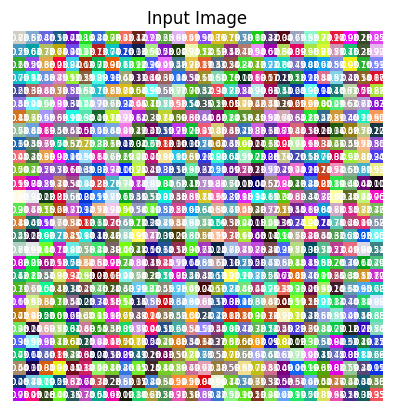

input_img.shape:torch.Size([3, 28, 28]) | c:3, h:28, w:28
output_img: torch.Size([8, 13, 13])
kernel: torch.Size([8, 3, 3, 3])
output_img:torch.Size([8, 13, 13])
Convolved: torch.Size([8, 13, 13])
Output shape: torch.Size([8, 13, 13])


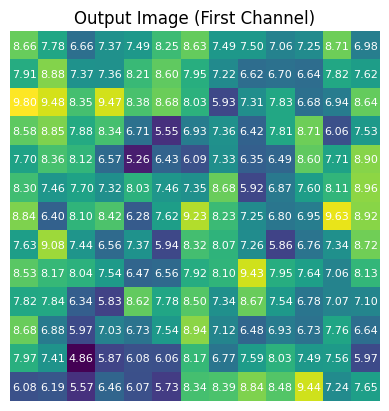

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

class Convolution:
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride
        self.kernels = torch.rand(out_channels, in_channels, kernel_size, kernel_size)

    @staticmethod
    def scalar_product(mat1, mat2):
        return torch.sum(mat1 * mat2)
    
    def max_pooling(self, input_img, pool_size=2, stride=2):
        c, h, w = input_img.shape
        output_height = (h - pool_size) // stride + 1
        output_width = (w - pool_size) // stride + 1
        output_img = torch.zeros((self.out_channels, output_height, output_width))

        for channel in range(c):
            for row in range(0, output_height * stride, stride):
                for col in range(0, output_width * stride, stride):
                    output_img[channel, row // stride, col // stride] = torch.max(
                        input_img[channel, row:row+pool_size, col:col+pool_size]
                    )
        
        return output_img

    def _pad_input(self, input_img):
        if self.padding:
            c, h, w = input_img.shape
            new_img = torch.zeros((c, h + 2 * self.padding, w + 2 * self.padding))
            new_img[:, self.padding:-self.padding, self.padding:-self.padding] = input_img
            return new_img
        return input_img

    def convolve(self, input_img):
        c, h, w = input_img.shape
        print(f"input_img.shape:{input_img.shape} | c:{c}, h:{h}, w:{w}")
        
        output_height = (h - self.kernel_size + 2 * self.padding) // self.stride + 1
        output_width = (w - self.kernel_size + 2 * self.padding) // self.stride + 1
        output_img = torch.zeros((self.out_channels, output_height, output_width))

        print(f"output_img: {output_img.shape}")
        print(f"kernel: {self.kernels.shape}")

        input_img = self._pad_input(input_img)
        print(f"output_img:{output_img.shape}")

        for out_channel in range(self.out_channels):
            for row in range(output_img.shape[1]):
                for col in range(output_img.shape[2]):
                    start_row = row * self.stride
                    start_col = col * self.stride
                    for in_channel in range(self.in_channels):
                        output_img[out_channel, row, col] += self.scalar_product(
                            input_img[in_channel, start_row:start_row+self.kernel_size, start_col:start_col+self.kernel_size],
                            self.kernels[out_channel, in_channel]
                        )               
        print(f"Convolved: {output_img.shape}")
        return output_img

    def __call__(self, input_img):
        return self.convolve(input_img)

    @staticmethod
    def display_matrix(matrix, title=""):
        fig, ax = plt.subplots()
        if matrix.ndim == 3:
            c, h, w = matrix.shape
            matrix = matrix.permute(1, 2, 0)  # Change (C, H, W) to (H, W, C)
            if c == 1:
                matrix = matrix.squeeze()
                im = ax.imshow(matrix.detach().numpy(), cmap='viridis')
            else:
                im = ax.imshow(matrix.detach().numpy())
            for i in range(h):
                for j in range(w):
                    for k in range(min(c, 3)):  # Display up to 3 channels
                        ax.text(j, i, f'{matrix[i, j, k]:.2f}', ha='center', va='center', color='w', fontsize=6)
        else:
            im = ax.imshow(matrix.detach().numpy(), cmap='viridis')
            for (i, j), val in np.ndenumerate(matrix.detach().numpy()):
                ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='w', fontsize=8)

        plt.title(title)
        # plt.colorbar(im)
        plt.axis(False)
        plt.show()

def main():
    input_img = torch.rand((3, 28, 28))
    in_channels = 3
    out_channels = 8
    kernel_size = 3
    stride = 2
    padding = 0

    cv = Convolution(in_channels, out_channels, kernel_size, stride, padding)
    
    # Display input image
    cv.display_matrix(input_img, "Input Image")
    
    output = cv(input_img)
    print(f"Output shape: {output.shape}")
    
    # Display output (first channel)
    cv.display_matrix(output[0], "Output Image (First Channel)")

if __name__ == "__main__":
    main()

TypeError: Convolution.__call__() takes 2 positional arguments but 7 were given

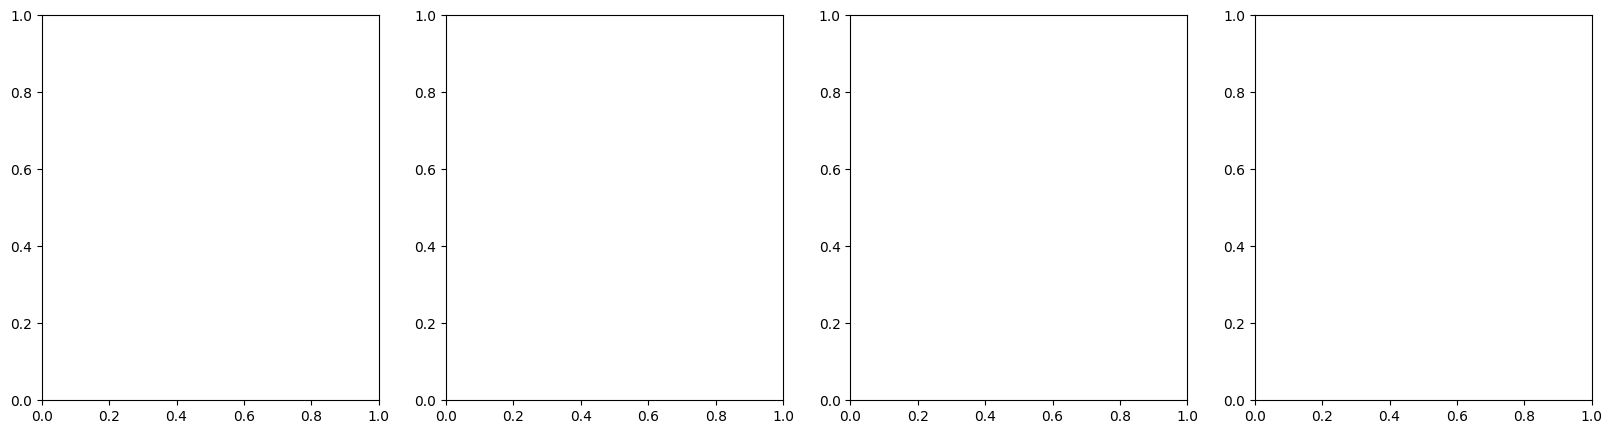

In [7]:

# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)

import matplotlib.pyplot as plt
import numpy as np
# Create a figure with a 3x1 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
pool_size = 2

output_image = cv(input_img, kernel_size, padding, stride, in_channels, out_channels)
in_channels = 8
output_image = cv(output_image, kernel_size, padding, stride, in_channels, out_channels)
# output_image = max_pooling(output_image, pool_size=pool_size, stride=pool_size)

output_image = cv(output_image, kernel_size, padding, stride, in_channels, out_channels)
# output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)
# output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)





# Plot the sliced input image
axes[0].set_title(f'inpu_image:{input_img.shape}')
axes[0].imshow(input_img.permute(1,2,0)[:,:,0])
axes[0].axis('off')
display_values(axes[0], input_img)





# output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)

# Plot the kernel image
axes[1].set_title(f'output_image:{output_image.shape}')
axes[1].imshow(output_image.permute(1,2,0)[:,:,1])
axes[1].axis('off')
display_values(axes[1], output_image)

# Plot the convolved result
# output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)

# convolved = o[:3, :3] @ cv.kernel
axes[2].set_title(f'output_image: {output_image.shape}')
axes[2].imshow(output_image.permute(1,2,0)[:,:,5])
axes[2].axis('off')
display_values(axes[2], output_image)

# Show the plots
# output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)

axes[3].set_title(f'output_image:{output_image.shape}')
axes[3].imshow(output_image.permute(1,2,0)[:,:,7])
axes[3].axis('off')
display_values(axes[3], output_image)

# Show the plots
plt.show()

# Perform the convolution operation (assuming cv.convolve() modifies or uses the attributes appropriately)
# cv.convolve()


### experimentation

input_img.shape:torch.Size([3, 28, 28]) | c:3, h:28, w:28
output_img: torch.Size([8, 16, 16])
kernel: torch.Size([8, 3, 3, 3])
	padding:3 added! torch.Size([3, 28, 28])-> torch.Size([3, 34, 34])
output_img:torch.Size([8, 16, 16])
------------------


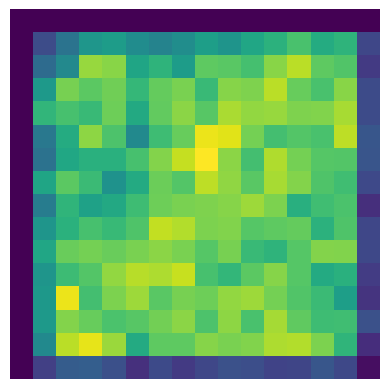

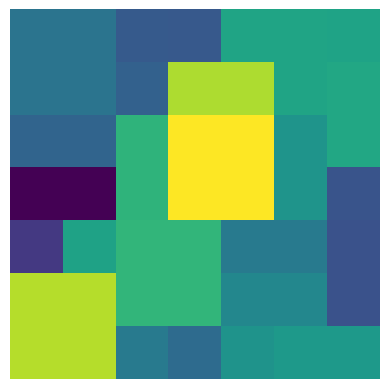

torch.Size([8, 7, 7])

In [ ]:
import torch
import matplotlib.pyplot as plt


import numpy as np

# Function to display matrix values on the subplot
def display_values(ax, matrix):
    # Check if the matrix is 3D
    if matrix.ndim == 3:
        c, h, w = matrix.shape  # Adjusted to handle (C, H, W) format
        matrix = matrix.permute(1, 2, 0)  # Change (C, H, W) to (H, W, C)
        # Iterate through each channel
        for i in range(h):
            for j in range(w):
                for k in range(c):
                    # ax.text(j, i, f'{matrix[i, j, k]:.2f}', ha='center', va='center', color='red')
                    pass
    else:
        # If the matrix is 2D, handle it directly
        for (i, j), val in np.ndenumerate(matrix):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red')




            



def scalar_product(mat1, mat2):
    # output = torch.zeros((3,3))
    # print("\t\t\tscalars")
    # print(f"\t\tmat1:{mat1.shape}")
    # print(f"\t\tmat2:{mat2.shape}")
    # for row in range(len(mat1)):
    #     for col in range(len(mat1[0])):

    #         output[row, col] = mat1[row, col] * mat2[row, col]
    
    # return output.sum()

    return (mat1 * mat2).sum()

# print(convolved)
# print(cv.kernel)
# scalar_product(convolved, cv.kernel)



def max_pooling(input_img, pool_size=2, stride=2):
    c, h, w = input_img.shape
    output_height = (h - pool_size) // stride + 1
    output_width = (w - pool_size) // stride + 1
    output_img = torch.zeros((c, output_height, output_width))

    for channel in range(c):
        for row in range(0, output_height * stride, stride):
            for col in range(0, output_width * stride, stride):
                output_img[channel, row // stride, col // stride] = torch.max(
                    input_img[channel, row:row+pool_size, col:col+pool_size]
                )
    
    return output_img





def convolve(input_img, kernel_size=3, padding = 0, stride=1, in_channels = 3, out_channels=3):
    c, h, w = input_img.shape
    print(f"input_img.shape:{input_img.shape} | c:{c}, h:{h}, w:{w}")
    kernels = torch.rand(out_channels, in_channels, kernel_size, kernel_size)
    output_height = (h - kernel_size + 2 * padding) // stride + 1
    output_width = (w - kernel_size + 2 * padding) // stride + 1
    output_img = torch.zeros((out_channels, output_height, output_width))



    # print(f"input_img:{input_img.shape}")
    print(f"output_img: {output_img.shape}")
    print(f"kernel: {kernels.shape}")

    if padding:
            new_img = torch.zeros((in_channels, h + 2 * padding, w + 2 * padding))
            new_img[:, padding:-padding, padding:-padding] = input_img

            print(f"\tpadding:{padding} added! {input_img.shape}-> {new_img.shape}")
            input_img = new_img

    print(f"output_img:{output_img.shape}")

    for out_channel in range(output_img.shape[0]):
        for row in range(0, output_img.shape[1]):
            for col in range(0, output_img.shape[2]):
########################################################################3
                # print(f"out_channel:{out_channel}, row:{row}, col:{col}")
                start_row = row * stride
                start_col = col * stride

                # print(f"out_channel:{out_channel}, row:{row}, col:{col}, row+stride:{start_row}, col+stride:{start_row}")

                for in_channel in range(in_channels):
                    output_img[out_channel, row, col] += scalar_product(
                        input_img[in_channel, start_row:start_row+kernel_size, start_col:start_col+kernel_size],
                        kernels[out_channel, in_channel, :, :]
                    )               # print(f"output_img[{out_channel}, {row}, {col}]:{output_img[out_channel, row, col]} | in_channel: {in_channel} ; out_channel: {out_channel}")
 ################################################################################33       
                    # print(f"kernel{channel}:{kernels[channel].shape}")
                    # print(col)
        # plt.imshow(output_img)
        # plt.axis(False)
        # plt.show()
    return output_img





kernel_size = 3
padding = 3
stride = 2
input_img = torch.rand(3, 28, 28)
# print(input_img.shape)

in_channels = 3
out_channels= 8 

output_image = convolve(input_img, kernel_size, padding, stride, in_channels, out_channels)

# plt.imshow()
# plt.show()
# output_image.shape

print("------------------")
# print(output_image.shape)
# output_image = output_image.permute(1,2,0)[:,:,0]
# print(output_image.shape)
# # output_image[:2]
# output_image = output_image[:,:,0]
# print(output_image.shape)


plt.imshow(output_image.permute(1,2,0)[:,:,0])
plt.axis(False)
plt.show()
output_image.shape

output_image = max_pooling(output_image, pool_size=2, stride=2)


plt.imshow(output_image.permute(1,2,0)[:,:,0])
plt.axis(False)
plt.show()
output_image.shape



input_img.shape:torch.Size([3, 28, 28]) | c:3, h:28, w:28
output_img: torch.Size([8, 16, 16])
kernel: torch.Size([8, 3, 3, 3])
	padding:3 added! torch.Size([3, 28, 28])-> torch.Size([3, 34, 34])
output_img:torch.Size([8, 16, 16])
input_img.shape:torch.Size([8, 16, 16]) | c:8, h:16, w:16
output_img: torch.Size([8, 10, 10])
kernel: torch.Size([8, 8, 3, 3])
	padding:3 added! torch.Size([8, 16, 16])-> torch.Size([8, 22, 22])
output_img:torch.Size([8, 10, 10])
input_img.shape:torch.Size([8, 5, 5]) | c:8, h:5, w:5
output_img: torch.Size([8, 5, 5])
kernel: torch.Size([8, 8, 3, 3])
	padding:3 added! torch.Size([8, 5, 5])-> torch.Size([8, 11, 11])
output_img:torch.Size([8, 5, 5])
input_img.shape:torch.Size([8, 5, 5]) | c:8, h:5, w:5
output_img: torch.Size([8, 5, 5])
kernel: torch.Size([8, 8, 3, 3])
	padding:3 added! torch.Size([8, 5, 5])-> torch.Size([8, 11, 11])
output_img:torch.Size([8, 5, 5])
input_img.shape:torch.Size([8, 5, 5]) | c:8, h:5, w:5
output_img: torch.Size([8, 5, 5])
kernel: torc

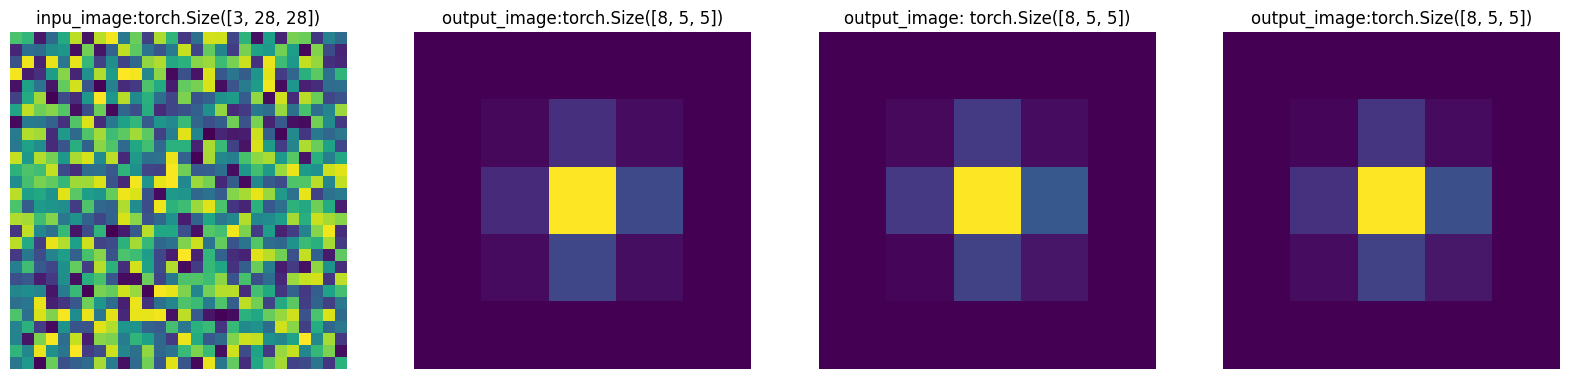

In [ ]:

# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)

import matplotlib.pyplot as plt
import numpy as np
# Create a figure with a 3x1 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
pool_size = 2

output_image = convolve(input_img, kernel_size, padding, stride, in_channels, out_channels)
in_channels = 8
output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)
output_image = max_pooling(output_image, pool_size=pool_size, stride=pool_size)

output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)
output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)
output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)





# Plot the sliced input image
axes[0].set_title(f'inpu_image:{input_img.shape}')
axes[0].imshow(input_img.permute(1,2,0)[:,:,0])
axes[0].axis('off')
display_values(axes[0], input_img)





# output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)

# Plot the kernel image
axes[1].set_title(f'output_image:{output_image.shape}')
axes[1].imshow(output_image.permute(1,2,0)[:,:,1])
axes[1].axis('off')
display_values(axes[1], output_image)

# Plot the convolved result
# output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)

# convolved = o[:3, :3] @ cv.kernel
axes[2].set_title(f'output_image: {output_image.shape}')
axes[2].imshow(output_image.permute(1,2,0)[:,:,5])
axes[2].axis('off')
display_values(axes[2], output_image)

# Show the plots
# output_image = convolve(output_image, kernel_size, padding, stride, in_channels, out_channels)

axes[3].set_title(f'output_image:{output_image.shape}')
axes[3].imshow(output_image.permute(1,2,0)[:,:,7])
axes[3].axis('off')
display_values(axes[3], output_image)

# Show the plots
plt.show()

# Perform the convolution operation (assuming cv.convolve() modifies or uses the attributes appropriately)
# cv.convolve()


Input shape: torch.Size([3, 80, 80])
Output shape: torch.Size([82, 82])


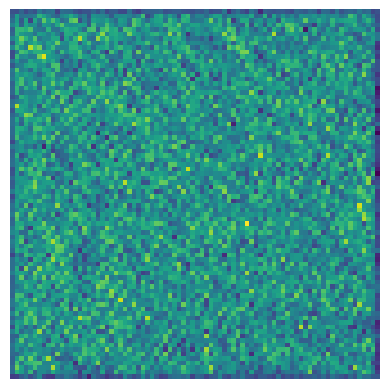

In [107]:
import torch
import torch.nn as nn


in_channels = 3
out_channels = 8
kernel_size = 3
stride = 1
padding = 2
input_img = torch.rand((3, 80, 80))



# Define an example RGB image with size (28, 28, 3)
# input_image = torch.rand((1, 3, 28, 28))  # Batch size of 1, 3 channels (RGB), 28x28 pixels

# Define a convolutional layer with 3 input channels (RGB) and 16 output channels (feature maps)
conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
conv_layer1 = nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding)
conv_layer2 = nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding)
conv_layer3 = nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding)
conv_layer4 = nn.Conv2d(out_channels, out_channels, kernel_size, stride, padding)



# Apply the convolutional layer
output_image = conv_layer(input_img)
# output_image = conv_layer1(input_image)

# output_image = conv_layer2(input_image)
# output_image = conv_layer3(input_image)
# output_image = conv_layer4(input_image)



print(f"Input shape: {input_img.shape}")  # torch.Size([1, 3, 28, 28])
print(f"Output shape: {output_image[0].shape}")  # torch.Size([1, 16, 28, 28])
plt.axis(False)
plt.imshow(output_image[4,:,:].detach().numpy())

In [ ]:
import torch
import matplotlib.pyplot as plt 

class Convolution:
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0) -> None:
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride

    def scalar_product(self, mat1, mat2):
        return (mat1 * mat2).sum()
    
    def max_pooling(self, input_img, pool_size=2, stride=2):
        c, h, w = input_img.shape
        output_height = (h - pool_size) // stride + 1
        output_width = (w - pool_size) // stride + 1
        output_img = torch.zeros((c, output_height, output_width))  # Fix here

        for channel in range(c):
            for row in range(0, output_height * stride, stride):
                for col in raimgnge(0, output_width * stride, stride):
                    output_img[channel, row // stride, col // stride] = torch.max(
                        input_img[channel, row:row+pool_size, col:col+pool_size]
                    )
        
        return output_img

    def convolve(self, input_img):
        c, h, w = input_img.shape
        print(f"input_img.shape: {input_img.shape} | c: {c}, h: {h}, w: {w}")
        kernels = torch.rand(self.out_channels, self.in_channels, self.kernel_size, self.kernel_size)  # Fix here
        output_height = (h - self.kernel_size + 2 * self.padding) // self.stride + 1  # Fix here
        output_width = (w - self.kernel_size + 2 * self.padding) // self.stride + 1  # Fix here
        output_img = torch.zeros((self.out_channels, output_height, output_width))  # Fix here

        if self.padding:
            new_img = torch.zeros((self.in_channels, h + 2 * self.padding, w + 2 * self.padding))  # Fix here
            new_img[:, self.padding:-self.padding, self.padding:-self.padding] = input_img
            print(f"\tpadding: {self.padding} added! {input_img.shape} -> {new_img.shape}")
            input_img = new_img

        for out_channel in range(self.out_channels):
            for row in range(output_img.shape[1]):
                for col in range(output_img.shape[2]):
                    start_row = row * self.stride
                    start_col = col * self.stride
                    for in_channel in range(self.in_channels):
                        output_img[out_channel, row, col] += self.scalar_product(
                            input_img[in_channel, start_row:start_row+self.kernel_size, start_col:start_col+self.kernel_size],
                            kernels[out_channel, in_channel, :, :]
                        )
        print(f"Convolved: {output_img.shape}")
        return output_img

    def __call__(self, input_img):
        input_img = self.convolve(input_img)
        return input_img

input_img = torch.rand((3, 28, 28))
in_channels = 3
out_channels = 8
kernel_size = 3
stride = 2
padding = 0

cv = Convolution(in_channels, out_channels, kernel_size, stride, padding)

output_shape = cv(input_img).shape  # Capture the shape correctly
print(f"Output shape: {output_shape}")


input_img.shape: torch.Size([3, 28, 28]) | c: 3, h: 28, w: 28
Convolved: torch.Size([8, 13, 13])
Output shape: torch.Size([8, 13, 13])


In [ ]:
import torch

# Interface for Convolution Operation
class IConvolution:
    def convolve(self, input_img):
        raise NotImplementedError

# Interface for Pooling Operation
class IPooling:
    def max_pooling(self, input_img, pool_size, stride):
        raise NotImplementedError

# Scalar Product Operation
class ScalarProductOperation:
    def scalar_product(self, mat1, mat2):
        return (mat1 * mat2).sum()

# Concrete Implementation of Convolution
class BasicConvolution(IConvolution):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0) -> None:
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride

    def convolve(self, input_img):
        c, h, w = input_img.shape
        kernels = torch.rand(self.out_channels, self.in_channels, self.kernel_size, self.kernel_size)
        output_height = (h - self.kernel_size + 2 * self.padding) // self.stride + 1
        output_width = (w - self.kernel_size + 2 * self.padding) // self.stride + 1
        output_img = torch.zeros((self.out_channels, output_height, output_width))

        if self.padding:
            new_img = torch.zeros((self.in_channels, h + 2 * self.padding, w + 2 * self.padding))
            new_img[:, self.padding:-self.padding, self.padding:-self.padding] = input_img
            input_img = new_img

        scalar_product_op = ScalarProductOperation()
        for out_channel in range(self.out_channels):
            for row in range(output_img.shape[1]):
                for col in range(output_img.shape[2]):
                    start_row = row * self.stride
                    start_col = col * self.stride
                    for in_channel in range(self.in_channels):
                        output_img[out_channel, row, col] += scalar_product_op.scalar_product(
                            input_img[in_channel, start_row:start_row+self.kernel_size, start_col:start_col+self.kernel_size],
                            kernels[out_channel, in_channel, :, :]
                        )               
        return output_img

# Concrete Implementation of Pooling
class BasicPooling(IPooling):
    def max_pooling(self, input_img, pool_size=2, stride=2):
        c, h, w = input_img.shape
        output_height = (h - pool_size) // stride + 1
        output_width = (w - pool_size) // stride + 1
        output_img = torch.zeros((c, output_height, output_width))

        for channel in range(c):
            for row in range(0, output_height * stride, stride):
                for col in range(0, output_width * stride, stride):
                    output_img[channel, row // stride, col // stride] = torch.max(
                        input_img[channel, row:row+pool_size, col:col+pool_size]
                    )
        
        return output_img

# Usage
input_img = torch.rand((3, 28, 28))
conv = BasicConvolution(in_channels=3, out_channels=8, kernel_size=3, stride=2, padding=0)
pooled_img = conv.convolve(input_img)
pooled_img.shape


torch.Size([8, 13, 13])

# CNN implementation

In [110]:
import numpy as np
import torch
import matplotlib.pyplot as plt

class Convolution:
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride
        self.kernels = torch.rand(out_channels, in_channels, kernel_size, kernel_size)

    @staticmethod
    def scalar_product(mat1, mat2):
        return torch.sum(mat1 * mat2)
    
    def relu(self, x):
        return np.maximum(torch.tensor(0), x)
    
    def max_pooling(self, input_img, pool_size=2, stride=2):
        c, h, w = input_img.shape
        output_height = (h - pool_size) // stride + 1
        output_width = (w - pool_size) // stride + 1
        output_img = torch.zeros((self.out_channels, output_height, output_width))

        for channel in range(c):
            for row in range(0, output_height * stride, stride):
                for col in range(0, output_width * stride, stride):
                    output_img[channel, row // stride, col // stride] = torch.max(
                        input_img[channel, row:row+pool_size, col:col+pool_size]
                    )
        
        return output_img

    def _pad_input(self, input_img):
        if self.padding:
            c, h, w = input_img.shape
            new_img = torch.zeros((c, h + 2 * self.padding, w + 2 * self.padding))
            new_img[:, self.padding:-self.padding, self.padding:-self.padding] = input_img
            return new_img
        return input_img

    def convolve(self, input_img):
        c, h, w = input_img.shape
        print(f"input_img.shape:{input_img.shape} | c:{c}, h:{h}, w:{w}")
        
        output_height = (h - self.kernel_size + 2 * self.padding) // self.stride + 1
        output_width = (w - self.kernel_size + 2 * self.padding) // self.stride + 1
        output_img = torch.zeros((self.out_channels, output_height, output_width))

        print(f"output_img: {output_img.shape}")
        print(f"kernel: {self.kernels.shape}")

        input_img = self._pad_input(input_img)
        print(f"output_img:{output_img.shape}")

        for out_channel in range(self.out_channels):
            for row in range(output_img.shape[1]):
                for col in range(output_img.shape[2]):
                    start_row = row * self.stride
                    start_col = col * self.stride
                    for in_channel in range(self.in_channels):
                        output_img[out_channel, row, col] += self.scalar_product(
                            input_img[in_channel, start_row:start_row+self.kernel_size, start_col:start_col+self.kernel_size],
                            self.kernels[out_channel, in_channel]
                        )               
        print(f"Convolved: {output_img.shape}")
        return self.relu(output_img)

    def __call__(self, input_img):
        return self.convolve(input_img)

    @staticmethod
    def display_matrix(matrix, title=""):
        fig, ax = plt.subplots()
        if matrix.ndim == 3:
            c, h, w = matrix.shape
            matrix = matrix.permute(1, 2, 0)  # Change (C, H, W) to (H, W, C)
            if c == 1:
                matrix = matrix.squeeze()
                im = ax.imshow(matrix.detach().numpy(), cmap='viridis')
            else:
                im = ax.imshow(matrix.detach().numpy())
            for i in range(h):
                for j in range(w):
                    for k in range(min(c, 3)):  # Display up to 3 channels
                        ax.text(j, i, f'{matrix[i, j, k]:.2f}', ha='center', va='center', color='w', fontsize=6)
        else:
            im = ax.imshow(matrix.detach().numpy(), cmap='viridis')
            for (i, j), val in np.ndenumerate(matrix.detach().numpy()):
                ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='w', fontsize=8)

        plt.title(title)
        # plt.colorbar(im)
        plt.axis(False)
        plt.show()



input_img.shape:torch.Size([3, 80, 80]) | c:3, h:80, w:80
output_img: torch.Size([8, 26, 26])
kernel: torch.Size([8, 3, 8, 8])
output_img:torch.Size([8, 26, 26])
Convolved: torch.Size([8, 26, 26])
Output shape: torch.Size([8, 26, 26])


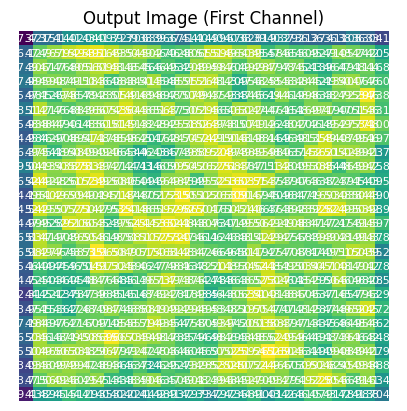

input_img.shape:torch.Size([8, 26, 26]) | c:8, h:26, w:26
output_img: torch.Size([8, 8, 8])
kernel: torch.Size([8, 8, 8, 8])
output_img:torch.Size([8, 8, 8])
Convolved: torch.Size([8, 8, 8])
Output shape: torch.Size([8, 8, 8])


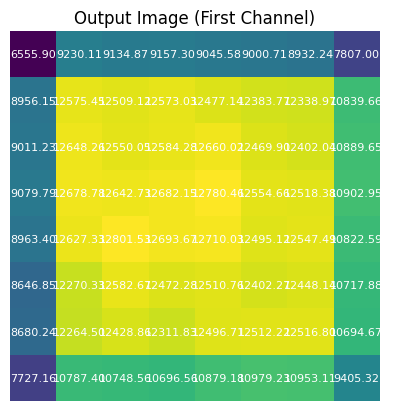

In [115]:
input_img = torch.rand((3, 80, 80))
# input_img = torch.rand((3, 945, 945))

in_channels = 3
out_channels = 8
kernel_size = 8
stride = 3
padding = 2

cv = Convolution(in_channels, out_channels, kernel_size, stride, padding)
# cv2 = Convolution(out_channels, out_channels, kernel_size, stride, padding)
# cv3 = Convolution(out_channels, out_channels, kernel_size, stride, padding)

# Display input image
# cv.display_matrix(img, "Input Image")

output_img = cv(input_img)
print(f"Output shape: {output_img.shape}")

# Display output (first channel)
cv.display_matrix(output_img[0], "Output Image (First Channel)")

cv = Convolution(out_channels, out_channels, kernel_size, stride, padding)
# cv2 = Convolution(out_channels, out_channels, kernel_size, stride, padding)
# cv3 = Convolution(out_channels, out_channels, kernel_size, stride, padding)

# Display input image
# cv.display_matrix(img, "Input Image")

output_img = cv(output_img)
print(f"Output shape: {output_img.shape}")

# Display output (first channel)
cv.display_matrix(output_img[0], "Output Image (First Channel)")

# output_img = cv2(output_img)
# print(f"Output shape: {output_img.shape}")

# # Display output (first channel)
# cv.display_matrix(output_img[0], "Output Image (First Channel)")


# output_img = cv3(output_img)
# print(f"Output shape: {output_img.shape}")

# # Display output (first channel)
# cv.display_matrix(output_img[0], "Output Image (First Channel)")




torch.Size([3, 945, 475])


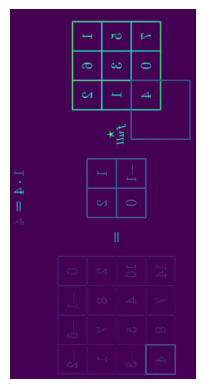

In [81]:
import cv2

img = cv2.imread('Untitled.png')
# [..., None]
# cv2.resize(img,(3, ) )
img = torch.tensor(img).permute(2,1,0)
print(img.shape)
plt.imshow(img[0].squeeze())
plt.axis(False)
plt.show()

In [56]:
# x= torch.randint((3,12))
x = torch.randint(-10, 2, (3,12))
x

# max(x)

tensor([[ -3,  -5,   1,  -8,   0,  -2,   1,   1,  -3,  -3,   0,  -6],
        [-10,  -6,  -1,  -1,  -1,  -3,  -1, -10,  -8,  -8,  -9,  -2],
        [ -1,  -7, -10, -10,  -4,  -5,   1,  -4,  -2,   0,   1,  -5]])

In [58]:
torch.maximum(torch.tensor(0), x)

tensor([[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])

In [59]:
np.maximum(torch.tensor(0), x)

tensor([[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])